In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500
mpl.rcParams['font.family']= 'Arial'

In [ ]:
cluster_features_enrich = pd.read_pickle("/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl")
cluster_features_enrich.head(1)

## Plotting of SG-related clusters

In [15]:
early_clusters = ['HNRNPA2B1(14)','HNRNPA2B1_1(16)','HNRNPA2B1_5(14)','HNRNPA2B1_2(16)','HNRNPA2B1_4(20)','HNRNPA2B1_3(19)','CPSF6(7)','HP1BP3_1(191)','KHDRBS1(9)']
late_clusters = ['EIF4G1(5)','DNAJA4(12)','EIF3G(16)']
innv_clusters = ['USP10(5)','GIGYF2(5)','ATXN2L(6)','SZRD1(12)']
cluster_order  = innv_clusters+early_clusters+late_clusters

In [ ]:
sg_related_feature_enrichment = pd.read_pickle("/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl").set_index(['Label']).loc[cluster_order,:].reset_index()
sg_related_feature_enrichment

,Label,Cluster,Size,Density,Internal weight,External weight,Quality,P-value,Members,FDR PS proteins,...,Frac RHK_IVMALP_deltazscores,Frac RHK_FWY_deltazscores,Frac STNQCG_IVMALP_deltazscores,Frac STNQCG_FWY_deltazscores,Frac IVMALP_FWY_deltazscores,Frac WT_pos_block,Frac WT_neg_block,Frac WT_all_block,Frac Hydropathy,Frac NCPR
0,USP10(5),1110,5,0.3210,3.210,54.53,0.04739,0.996692,Q9UN86 Q13283 Q5TZA2 Q14694 P30566,3.461064e-01,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.200000,0.200000
1,GIGYF2(5),1278,5,0.3210,3.210,57.76,0.04524,0.996692,Q13542 Q86W56 O75420 O60573 Q6Y7W6,9.834143e-02,...,0.200000,0.200000,0.200000,0.400000,0.400000,0.000000,0.400000,0.200000,0.000000,0.000000
2,ATXN2L(6),411,6,0.3726,5.589,67.84,0.06543,0.989880,Q8NCA5 Q8WWM7 Q99700 Q3MHD2 P00813 Q9BUT9,1.952822e-01,...,0.166667,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000
3,SZRD1(12),719,12,0.3156,20.830,176.80,0.09400,0.998225,O14893 Q9UHI6 P57678 Q8TEQ6 P83369 Q16637 Q8WX...,8.810641e-02,...,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000
4,HNRNPA2B1(14),308,14,0.3064,27.880,311.90,0.07580,0.999690,Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...,6.260171e-04,...,0.000000,0.000000,0.000000,0.071429,0.142857,0.000000,0.000000,0.071429,0.071429,0.071429
5,HNRNPA2B1_1(16),488,16,0.3041,36.490,287.60,0.10250,0.999965,Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...,5.136578e-07,...,0.062500,0.125000,0.187500,0.125000,0.250000,0.000000,0.187500,0.125000,0.000000,0.125000
6,HNRNPA2B1_5(14),1653,14,0.3022,27.500,234.30,0.09490,0.997642,Q15424 O14979 P35637 P52272 P55795 P22626 P519...,6.260171e-04,...,0.000000,0.071429,0.142857,0.142857,0.142857,0.000000,0.071429,0.071429,0.142857,0.071429
7,HNRNPA2B1_2(16),838,16,0.3177,38.130,307.90,0.10090,0.999987,P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...,1.089069e-08,...,0.312500,0.187500,0.375000,0.250000,0.312500,0.000000,0.187500,0.125000,0.000000,0.062500
8,HNRNPA2B1_4(20),1616,20,0.3025,57.480,453.30,0.10440,0.999900,P09651 P23246 Q15424 Q14151 O14979 P35637 Q5T4...,2.287416e-09,...,0.200000,0.100000,0.250000,0.150000,0.300000,0.000000,0.200000,0.150000,0.000000,0.050000
9,HNRNPA2B1_3(19),1056,19,0.3077,52.620,483.40,0.09167,0.999959,P09651 Q32P51 Q15424 O14979 P35637 O43347 P319...,3.207623e-06,...,0.052632,0.052632,0.052632,0.105263,0.210526,0.000000,0.052632,0.052632,0.052632,0.052632


In [20]:
all_features = [i.replace('Frac ','') for i in cluster_features_enrich.columns if 'Frac' in i]

In [21]:
sig_features = []
for f in sg_related_feature_enrichment.columns:
    if 'FDR' in f:
        if len(sg_related_feature_enrichment[sg_related_feature_enrichment[f]<0.05]) > 0:
            sig_features.append(f.replace('FDR ',''))

In [22]:
frac_features = []
for f in cluster_features_enrich.columns:
    if 'Frac' in f:
        if len(sg_related_feature_enrichment[sg_related_feature_enrichment[f]>0.5]) > 0:
            frac_features.append(f.replace('Frac ',''))

In [23]:
feature_specific = [i for i in all_features if i in sig_features+frac_features]

In [24]:
len(feature_specific)

101

In [25]:
feature_specific_enrich_count = pd.DataFrame(index=feature_specific,columns = ['Count','Fraction','Clusters'])

for f in feature_specific_enrich_count.index:
    if 'FDR '+f in cluster_features_enrich.columns:
        f_rep1 = 'FDR '+f
        f_rep2 = 'Frac '+f
    else:
        f_rep1 = 'Cluster'
        f_rep2 = 'Cluster'
        
    if f_rep1 != 'Cluster':
        feature_specific_enrich_count.loc[f,'Count'] = len(sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)])
        feature_specific_enrich_count.loc[f,'Fraction'] = len(sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)])/len(sg_related_feature_enrichment)
        feature_specific_enrich_count.loc[f,'Clusters'] = sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)]['Label'].tolist()
    else:
        feature_specific_enrich_count.loc[f,'Count'] = 0
        feature_specific_enrich_count.loc[f,'Fraction'] = 0
        feature_specific_enrich_count.loc[f,'Clusters'] = 0

In [26]:
feature_specific_enrich_count

,Count,Fraction,Clusters
PS proteins,16,1.0,"[USP10(5), GIGYF2(5), ATXN2L(6), SZRD1(12), HN..."
60s Acidic ribosomal protein,1,0.0625,[HP1BP3_1(191)]
AAA domain,1,0.0625,[HNRNPA2B1_2(16)]
Anticodon binding domain,1,0.0625,[DNAJA4(12)]
Anticodon-binding domain of tRNA ligase,1,0.0625,[DNAJA4(12)]
...,...,...,...
IVMALP_FWY_deltazscores,4,0.25,"[HNRNPA2B1_2(16), HNRNPA2B1_4(20), CPSF6(7), K..."
WT_pos_block,1,0.0625,[HP1BP3_1(191)]
WT_neg_block,1,0.0625,[HP1BP3_1(191)]
WT_all_block,1,0.0625,[HP1BP3_1(191)]


In [27]:
plot_features = ['MOD_PRMT_GGRGG_1','RNA recognition motif','Y','R','G','Q','G_omegazscores','R_omegazscores','N_omegazscores','Ataxin 2 SM domain','SUZ-C motif','GYF domain','DEAD/DEAH box helicase','Helicase conserved C-terminal domain','Anticodon binding domain','WHEP-TRS domain','Cytoskeletal-regulatory complex EF hand','PCI domain']
len(plot_features)

18

In [28]:
heatmap_data = pd.DataFrame(index=cluster_order,columns=plot_features)
for i in cluster_order:
    for j in plot_features:
        if i in feature_specific_enrich_count.loc[j,'Clusters']:
            heatmap_data.loc[i,j]=1
        else:
            heatmap_data.loc[i,j]=0

In [29]:
heatmap_data

,MOD_PRMT_GGRGG_1,RNA recognition motif,Y,R,G,Q,G_omegazscores,R_omegazscores,N_omegazscores,Ataxin 2 SM domain,SUZ-C motif,GYF domain,DEAD/DEAH box helicase,Helicase conserved C-terminal domain,Anticodon binding domain,WHEP-TRS domain,Cytoskeletal-regulatory complex EF hand,PCI domain
USP10(5),0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
GIGYF2(5),0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
ATXN2L(6),1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
SZRD1(12),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
HNRNPA2B1(14),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
HNRNPA2B1_1(16),1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
HNRNPA2B1_5(14),1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
HNRNPA2B1_2(16),1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
HNRNPA2B1_4(20),1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
HNRNPA2B1_3(19),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


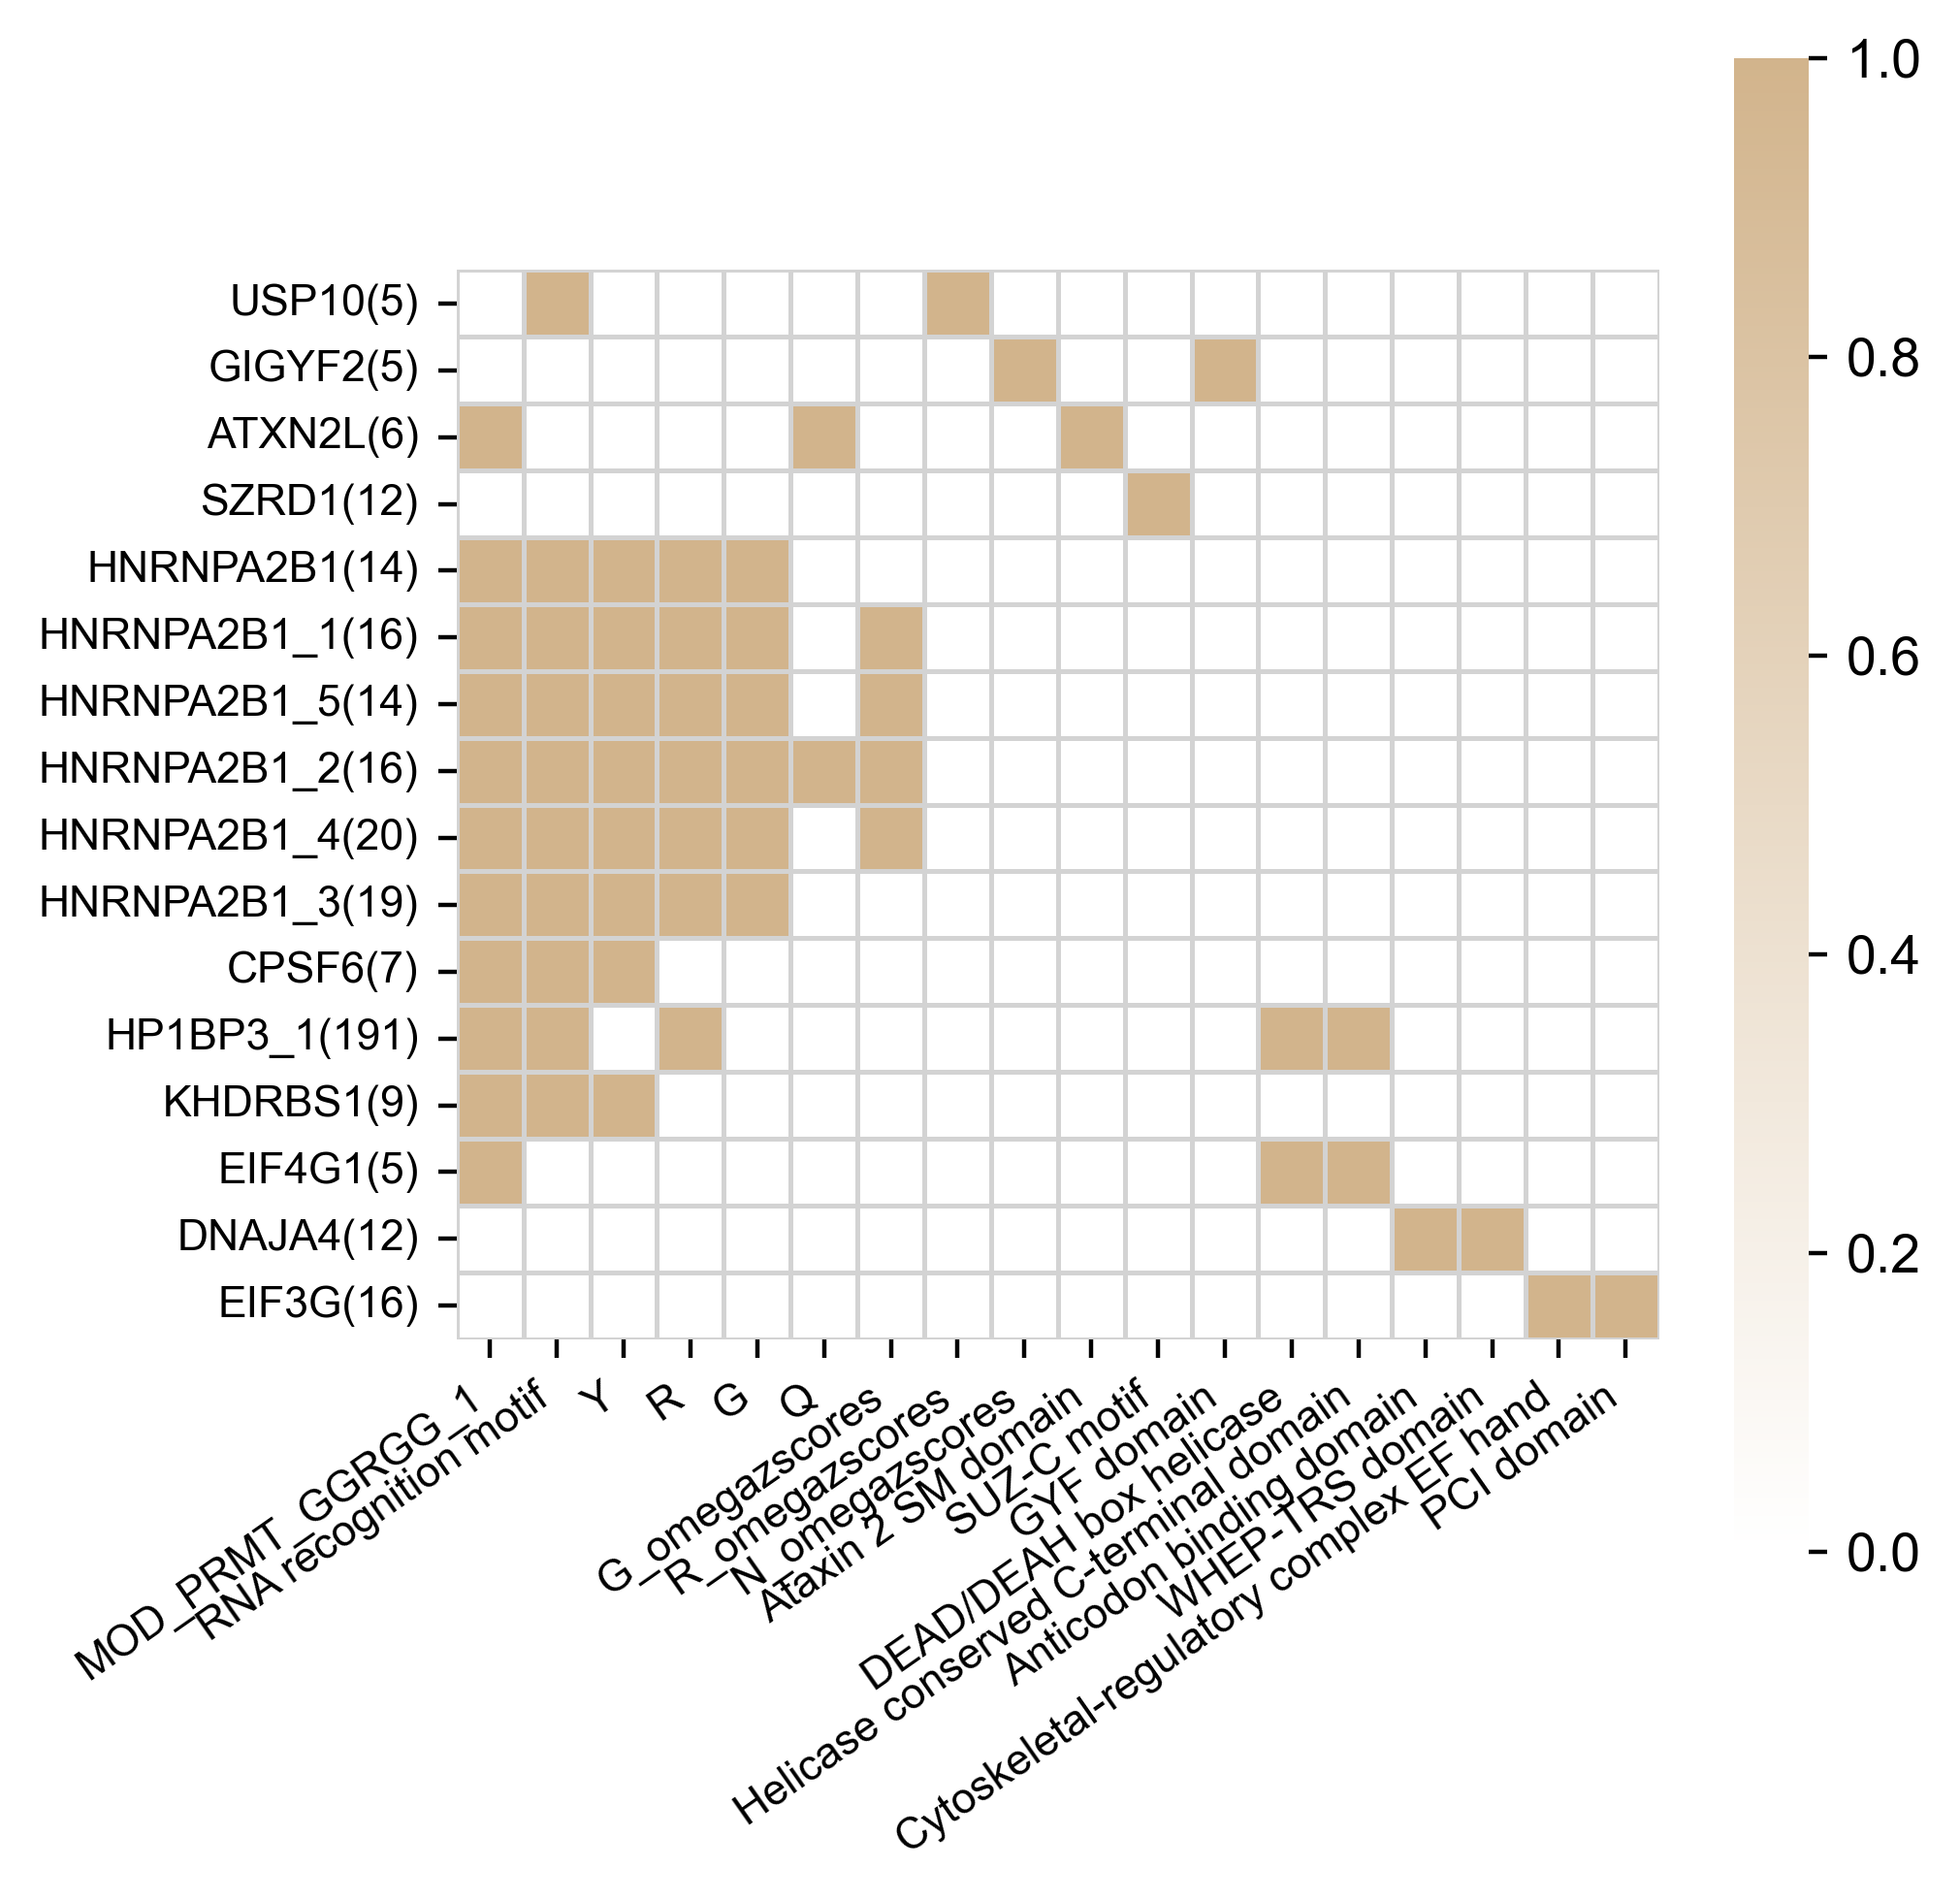

In [ ]:
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "tan"])
plt.figure(figsize=(5, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(heatmap_data.fillna(0), cmap = my_colormap1, 
            vmin=0,vmax = 1,square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')


### %Mean Disordered plotting

In [ ]:
disordered_datas = pd.read_pickle("/home/lyz/PhaSepGAT/OtherVisualization/data/human_IDR_sequence_features_202405.pkl")
disordered_datas

,uniprot,range,Sequence,length,A,C,D,E,F,G,...,RHK_FWY_deltazscores,STNQCG_IVMALP_deltazscores,STNQCG_FWY_deltazscores,IVMALP_FWY_deltazscores,WT_pos_block,WT_neg_block,WT_all_block,spacer_block_length,Hydropathy,Full Length
0,Q96QF7,"(0, 478)",MDGCKKELPRLQEPEEDEDCYILNVQSSSDDTSGSSVARRAPKRQA...,479,0.060543,0.014614,0.229645,0.093946,0.000000,0.025052,...,0.000000,4.152191,0.000000,0.000000,5.0,8.0,13.0,445.0,2.979541,691
1,Q13023,"(178, 753)",QTDILQAFSEETKEGRLDSLTEVDDSGQLTIKCSQNYLSLDCGITA...,576,0.048611,0.017361,0.052083,0.092014,0.015625,0.057292,...,0.000000,-0.877788,0.000000,0.000000,3.0,1.0,4.0,189.0,3.711632,2319
2,Q13023,"(1211, 1627)",MSEDALEWDEMDISNKLISLNEESNDLDQELQPVIPSLKLGETSNE...,417,0.026379,0.016787,0.069544,0.076739,0.026379,0.076739,...,0.487486,0.659230,0.497874,1.698903,1.0,3.0,4.0,291.0,3.881775,2319
3,Q13023,"(1641, 2053)",IQSPSEQKIKRSVSDITLQSSSQKMSFTGQMSLDIASSINEDSAAS...,413,0.046005,0.036320,0.089588,0.092010,0.019370,0.038741,...,0.000000,-1.867838,0.000000,0.000000,1.0,2.0,3.0,213.0,3.702663,2319
4,Q13023,"(2100, 2318)",PIQLRKGDFYSYLSLSSHDSDCGEVTNYIEEKSSTPLPLDTTDSGL...,219,0.082192,0.031963,0.077626,0.114155,0.027397,0.050228,...,0.000000,-0.841309,0.000000,0.000000,1.0,1.0,2.0,149.0,3.709132,2319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18980,P32314,"(18, 106)",EKIAGLSQIYKMGSLPEAVDAARPKATLVDSESADDELTNLNWLHE...,89,0.078652,0.011236,0.078652,0.089888,0.022472,0.067416,...,-0.405499,-0.782241,-1.146178,-0.012795,0.0,1.0,1.0,0.0,4.124719,431
18981,P32314,"(365, 430)",GYASQPCAKISEKGQSGKKMRKQTCQEIDEELKEAAGSLLHLAGIR...,66,0.090909,0.045455,0.015152,0.075758,0.000000,0.090909,...,0.000000,1.054799,0.000000,0.000000,1.0,0.0,1.0,0.0,3.642424,431
18982,P09038,"(0, 156)",MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRR...,157,0.133758,0.012739,0.025478,0.038217,0.006369,0.229299,...,0.000000,1.161301,0.000000,0.000000,1.0,0.0,1.0,0.0,3.668153,288
18983,P39748,"(330, 379)",SRQGSTQGRLDDFFKVTGSLSSAKRKEPEPKGSTKKKAKTGAAGKF...,50,0.080000,0.000000,0.040000,0.040000,0.060000,0.140000,...,0.025019,0.643538,2.955504,-0.078698,1.0,0.0,1.0,0.0,3.138000,380


In [826]:
heatmap_data_disordered = pd.DataFrame(index=cluster_order,columns=['%Disordered'])
for i in cluster_order:
    proteins = sg_related_feature_enrichment.set_index(['Label']).loc[i,'Members'].split(' ')
    disorder_frac = [np.sum(disordered_datas[disordered_datas['uniprot']==i]['length'].tolist())/disordered_datas[disordered_datas['uniprot']==i]['Full Length'].tolist()[0] if i in disordered_datas['uniprot'].tolist() else 0 for i in proteins]
    heatmap_data_disordered.loc[i,'%Disordered'] = np.mean(disorder_frac)

In [834]:
heatmap_data_disordered['class'] = ['Early']*9+['Invariable']*4+['Late']*3

C:\Users\wqswx\AppData\Local\Temp\ipykernel_14364\859122507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heatmap_data_disordered,x='class',y='%Disordered',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)


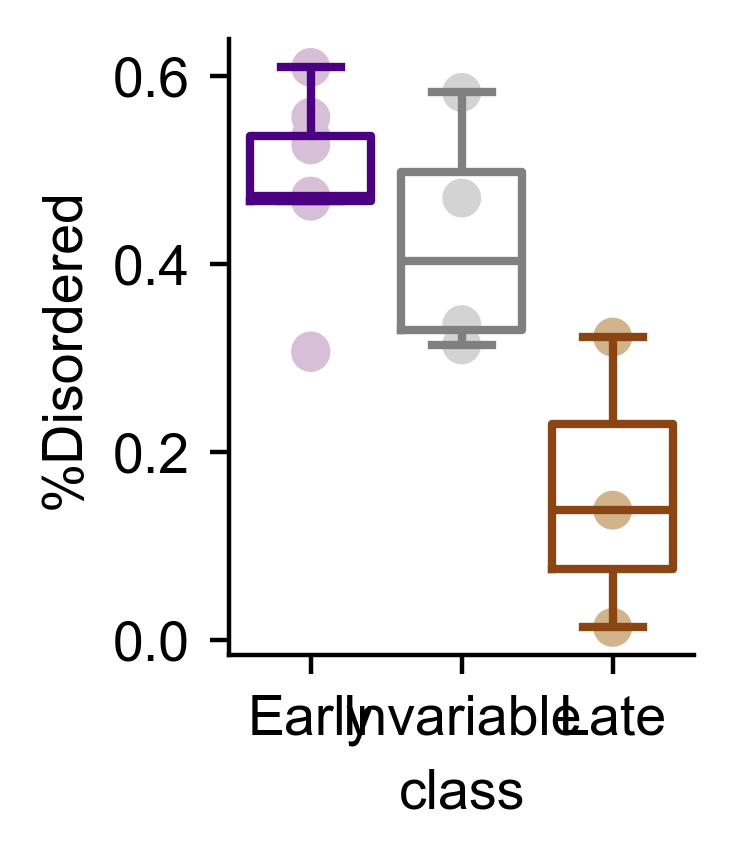

In [835]:
plt.figure(figsize=(1.5, 2),dpi = 400)

sns.boxplot(data=heatmap_data_disordered,x='class',y='%Disordered',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)
plt.scatter(data=heatmap_data_disordered,x='class',y='%Disordered',color = ['thistle']*9+['lightgrey']*4+['tan']*3)

sns.despine()
plt.savefig(f"E:/FigS6_1.png",bbox_inches = 'tight', dpi=500)

In [831]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[:9],heatmap_data_disordered['%Disordered'].tolist()[9:12])

MannwhitneyuResult(statistic=13.0, pvalue=1.0)

In [829]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[:9],heatmap_data_disordered['%Disordered'].tolist()[12:])

MannwhitneyuResult(statistic=32.0, pvalue=0.033566433566433566)

In [830]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[9:12],heatmap_data_disordered['%Disordered'].tolist()[12:])

MannwhitneyuResult(statistic=12.0, pvalue=0.05714285714285714)

## plot of single sequence feature

In [846]:
## Load Library

import random, scipy, math, re, itertools
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
#from Bio.Seq import Seq
import scipy.stats as stats
from collections import Counter
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)



# %matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.dpi'] = 600

In [847]:
## font_dict

font_title = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'bold',
    'size': 12,
    'style': 'normal'
}

font_label = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 12,
    'style': 'normal'
}

font_legend = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 6,
    'style': 'normal'
}

font_ticks = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size':  10,
    'style': 'normal'
}
font_ins_ticks = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size':  8,
    'style': 'normal'
}
font_ticklabels = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 5,
    'style': 'normal'
}

font_anno = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 8,
    'style': 'normal'
}

In [869]:
# RNA recognize motif, domain, IDR: Y,G,R

In [ ]:
domain_datas = pd.read_csv("../Clustering of PS condensates/RNA_recognition_motif.csv")
domain_datas

,Unnamed: 0,Uniprot,DataBase,DomainID,DomainName,Start,End,pvalue
0,32481,Q17RY0,Pfam,PF16367,RNA recognition motif,471,560,5.200000e-35
1,32482,Q7Z5Q1,Pfam,PF16367,RNA recognition motif,331,420,6.200000e-35
2,32483,Q8NE35,Pfam,PF16367,RNA recognition motif,440,529,1.400000e-34
3,32484,Q9BZB8,Pfam,PF16367,RNA recognition motif,310,410,2.700000e-33
4,32485,Q14011,Pfam,PF00076,RNA recognition motif,8,78,9.300000e-23
...,...,...,...,...,...,...,...,...
314,32795,Q8IUH3,Pfam,PF00076,RNA recognition motif,406,457,2.700000e-02
315,32796,Q9BZC1,Pfam,PF00076,RNA recognition motif,442,473,2.800000e-02
316,32797,Q8N684,Pfam,PF00076,RNA recognition motif,84,155,3.200000e-02
317,32798,O43719,Pfam,PF00076,RNA recognition motif,135,212,3.500000e-02


In [ ]:
motif_datas = pd.read_csv("../Clustering of PS condensates/MOD_PRMT_GGRGG.csv")
motif_datas

,Unnamed: 0,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
0,4141,ELME000447,MOD_PRMT_GGRGG_1,Q6PKC3,5.0,9.0,+,19.61730,0.000001,0.0913,GGRGG
1,4142,ELME000447,MOD_PRMT_GGRGG_1,Q9NY12,6.0,10.0,+,19.61730,0.000001,0.0913,GGRGG
2,4143,ELME000447,MOD_PRMT_GGRGG_1,Q15306,6.0,10.0,+,19.61730,0.000001,0.0913,GGRGG
3,4144,ELME000447,MOD_PRMT_GGRGG_1,Q9C073,7.0,11.0,+,19.61730,0.000001,0.0913,GGRGG
4,4145,ELME000447,MOD_PRMT_GGRGG_1,Q13191,11.0,15.0,+,19.61730,0.000001,0.0913,GGRGG
...,...,...,...,...,...,...,...,...,...,...,...
4556,240577,ELME000447,MOD_PRMT_GGRGG_1,Q15911,3521.0,3525.0,+,7.44444,0.000087,0.2160,GGGGG
4557,240578,ELME000447,MOD_PRMT_GGRGG_1,Q15911,3522.0,3526.0,+,7.44444,0.000087,0.2160,GGGGG
4558,240579,ELME000447,MOD_PRMT_GGRGG_1,Q15911,3523.0,3527.0,+,7.44444,0.000087,0.2160,GGGGG
4559,240580,ELME000447,MOD_PRMT_GGRGG_1,Q15751,3765.0,3769.0,+,7.44444,0.000087,0.2160,GGLGG


In [ ]:
aa_feature_datas = pd.read_pickle("../data/human_IDR_sequence_features_202405.pkl")
aa_feature_datas

,uniprot,range,Sequence,length,A,C,D,E,F,G,...,RHK_FWY_deltazscores,STNQCG_IVMALP_deltazscores,STNQCG_FWY_deltazscores,IVMALP_FWY_deltazscores,WT_pos_block,WT_neg_block,WT_all_block,spacer_block_length,Hydropathy,Full Length
0,Q96QF7,"(0, 478)",MDGCKKELPRLQEPEEDEDCYILNVQSSSDDTSGSSVARRAPKRQA...,479,0.060543,0.014614,0.229645,0.093946,0.000000,0.025052,...,0.000000,4.152191,0.000000,0.000000,5.0,8.0,13.0,445.0,2.979541,691
1,Q13023,"(178, 753)",QTDILQAFSEETKEGRLDSLTEVDDSGQLTIKCSQNYLSLDCGITA...,576,0.048611,0.017361,0.052083,0.092014,0.015625,0.057292,...,0.000000,-0.877788,0.000000,0.000000,3.0,1.0,4.0,189.0,3.711632,2319
2,Q13023,"(1211, 1627)",MSEDALEWDEMDISNKLISLNEESNDLDQELQPVIPSLKLGETSNE...,417,0.026379,0.016787,0.069544,0.076739,0.026379,0.076739,...,0.487486,0.659230,0.497874,1.698903,1.0,3.0,4.0,291.0,3.881775,2319
3,Q13023,"(1641, 2053)",IQSPSEQKIKRSVSDITLQSSSQKMSFTGQMSLDIASSINEDSAAS...,413,0.046005,0.036320,0.089588,0.092010,0.019370,0.038741,...,0.000000,-1.867838,0.000000,0.000000,1.0,2.0,3.0,213.0,3.702663,2319
4,Q13023,"(2100, 2318)",PIQLRKGDFYSYLSLSSHDSDCGEVTNYIEEKSSTPLPLDTTDSGL...,219,0.082192,0.031963,0.077626,0.114155,0.027397,0.050228,...,0.000000,-0.841309,0.000000,0.000000,1.0,1.0,2.0,149.0,3.709132,2319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18980,P32314,"(18, 106)",EKIAGLSQIYKMGSLPEAVDAARPKATLVDSESADDELTNLNWLHE...,89,0.078652,0.011236,0.078652,0.089888,0.022472,0.067416,...,-0.405499,-0.782241,-1.146178,-0.012795,0.0,1.0,1.0,0.0,4.124719,431
18981,P32314,"(365, 430)",GYASQPCAKISEKGQSGKKMRKQTCQEIDEELKEAAGSLLHLAGIR...,66,0.090909,0.045455,0.015152,0.075758,0.000000,0.090909,...,0.000000,1.054799,0.000000,0.000000,1.0,0.0,1.0,0.0,3.642424,431
18982,P09038,"(0, 156)",MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRR...,157,0.133758,0.012739,0.025478,0.038217,0.006369,0.229299,...,0.000000,1.161301,0.000000,0.000000,1.0,0.0,1.0,0.0,3.668153,288
18983,P39748,"(330, 379)",SRQGSTQGRLDDFFKVTGSLSSAKRKEPEPKGSTKKKAKTGAAGKF...,50,0.080000,0.000000,0.040000,0.040000,0.060000,0.140000,...,0.025019,0.643538,2.955504,-0.078698,1.0,0.0,1.0,0.0,3.138000,380


In [856]:
aa_feature_datas['range'][0]

'(0, 478)'

In [905]:
plot_name = ['Q92804','P35637','P31942','P55795','Q13151','Q32P51','P22626','B1ATL7','P51991','P52597','P52272','Q86Y13','P31943','Q99990']

In [907]:
plot_name = ['Q13283','Q14694']

In [909]:
plot_name = ['Q04637','O60516']

In [911]:
plot_name = ['Q9UN86','Q5TZA2']

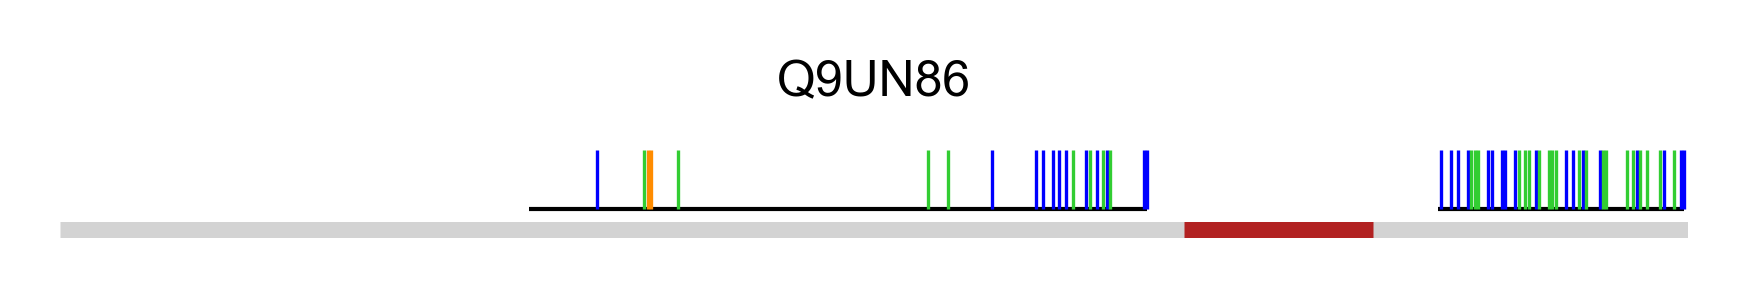

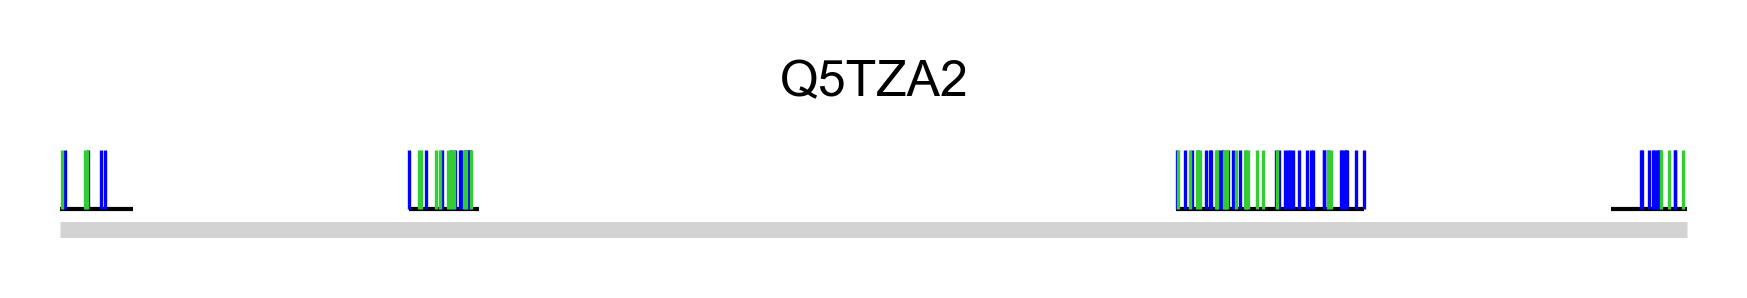

In [ ]:
for name in plot_name:
    protein_length = aa_feature_datas[aa_feature_datas['uniprot']==name]['Full Length'].tolist()[0]
    motif_ranges = [[motif_datas.loc[i,'start'],motif_datas.loc[i,'stop']] for i in motif_datas[motif_datas['sequence_name']==name].index]
    domain_ranges = [[domain_datas.loc[i,'Start'],domain_datas.loc[i,'End']] for i in domain_datas[domain_datas['Uniprot']==name].index]
    
    
    fig, ax = plt.subplots(figsize=(3.5, 0.2))

    ax.set_xlim(0,protein_length)
    ax.hlines(0, 0, protein_length, linewidth=3, linestyle='-', color='lightgrey')

    #plot of domain
    for m in range(len(domain_ranges)):
        pos_region = domain_ranges[m]
        ax.hlines(0, pos_region[0], pos_region[1], linewidth=3, linestyle='-', color='firebrick')

    #plot of RRM
    for m in range(len(motif_ranges)):
        pos_region = motif_ranges[m]
        ax.hlines(0, pos_region[0], pos_region[1], linewidth=3, linestyle='-', color='lightcoral')
    plt.xticks([])
    ax.set_xticks([])
    plt.yticks([])
    ax.set_yticks([])

    plt.title(name,fontsize=6)


    #plot of amino acid
    idr_region = [[int(m) for m in i[1:-1].split(', ')] for i in aa_feature_datas[aa_feature_datas['uniprot']==name]['range'].tolist()]
    idr_seqs = aa_feature_datas[aa_feature_datas['uniprot']==name]['Sequence'].tolist()


    for t in range(len(idr_region)):
        rs = idr_region[t]
        ax.hlines(0.06, rs[0], rs[1], linewidth=0.5, linestyle='-', color='black')
        seq = idr_seqs[t]

        Y_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='Y']
        R_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='R']
        G_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='G']

        ax.vlines(Y_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='darkorange')
        ax.vlines(R_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='blue')
        ax.vlines(G_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='limegreen')



    sns.despine(bottom=True,top=True,left=True,right=True)


In [881]:
domain_ranges

[[114, 172], [23, 88]]